# <p style="text-align: center;">REGRESSION ANALYSIS OF 50 COMPANIES DATA</p>

<br>

## <p style="text-align: center;">INTERNSHIP PROJECT REPORT</p>

<br>

### <p style="text-align: center;">NAME OF CANDIDATE: SAURABH KUMAR</p>

<br>

### <p style="text-align: center;">DEPARTMENT OF: Artificial Intelligence and Data Science</p>



### <p style="text-align: center;">BITS PILANI, PILANI CAMPUS, RAJASTHAN</p>




In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("sklearn version:", sklearn.__version__)
print("scipy version:", scipy.__version__)

NumPy version: 1.21.5
Pandas version: 1.4.4
seaborn version: 0.11.2
sklearn version: 1.0.2
scipy version: 1.9.1


In [2]:
# importing dataset as pandas DataFrame
df = pd.read_csv("50_Startups.csv")

In [3]:
# displaying first five rows of dataset to get clarity over number of columns types of data
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
# checking the basic infromation about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
# some basic stats for the dataset
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


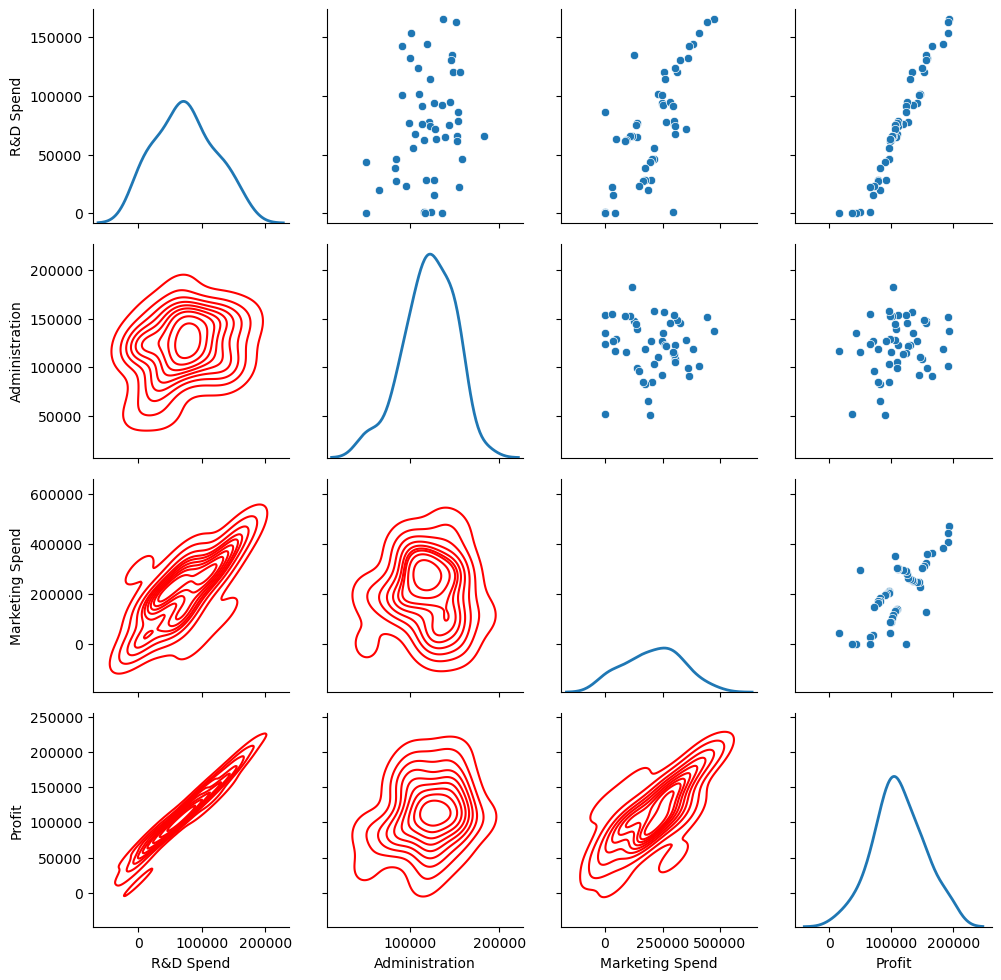

In [6]:
# some visual representation to get some clarity over the pattern and relationships
# between features and between features and the target variable
g = sns.PairGrid(df)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.kdeplot, lw=2)
g = g.map_lower(sns.kdeplot, colors="red")

__Based on the above fig, only R & D and Marketing spending strongly correlate with Profit, and marketing has a high spread.__

In [7]:
# Function for outlier detection
def outlier_detection(col):
    IQR=np.quantile(col,.75)-np.quantile(col,.25)
    ur=np.quantile(col,.75)+(1.5*IQR)
    lr=np.quantile(col,.25)-(1.5*IQR)
    return ur,lr

In [8]:

for i in df.columns:
    ur,lr=outlier_detection(df[i])
    print(i)
    print(df[df[i]<lr])
    print(df[df[i]>ur])
    

R&D Spend
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, Profit]
Index: []
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, Profit]
Index: []
Administration
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, Profit]
Index: []
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, Profit]
Index: []
Marketing Spend
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, Profit]
Index: []
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, Profit]
Index: []
Profit
    R&D Spend  Administration  Marketing Spend   Profit
49        0.0        116983.8         45173.06  14681.4
Empty DataFrame
Columns: [R&D Spend, Administration, Marketing Spend, Profit]
Index: []


__Based on the above result, it has been found that only profit has an outlier, so I will remove it, as linear regression algorithms are sensitive to outliers.__

In [9]:
ur,lr=outlier_detection(df['Profit'])

In [10]:
df[df['Profit']<lr]

,R&D Spend,Administration,Marketing Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [11]:
df=df[df['Profit']>lr]

In [12]:
X = df.drop('Profit',axis=1)  
y = df['Profit']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
X_train.shape

(34, 3)

__I have chosen the training set of 70 % of the data, with 34 data points and a fixed random state for 101.__

-----

# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr_model = LinearRegression()

In [18]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [19]:
lr_preds = lr_model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
lr_list=['Linear_regression',np.sqrt(mean_squared_error(y_test,lr_preds))]
lr_list

['Linear_regression', 8273.557668008163]

In [22]:
error_df = pd.DataFrame(columns=['Model', 'Error'])
lr_list=['Linear Regression',np.sqrt(mean_squared_error(y_test,lr_preds))]
# Create a DataFrame from the new row
new_row = pd.DataFrame([lr_list], columns=['Model', 'Error'])

# Append the new row to the existing DataFrame
error_df = pd.concat([error_df, new_row], ignore_index=True)


---

# Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_conv=PolynomialFeatures(degree=2,include_bias=False)

In [26]:
poly_features = poly_conv.fit_transform(X)

In [27]:
poly_features.shape

(49, 9)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [29]:
pl_model=LinearRegression(fit_intercept=True)

In [30]:
pl_model.fit(X_train,y_train)

LinearRegression()

In [31]:
pl_preds = pl_model.predict(X_test)

In [32]:
pl_list=['Polynomial Regression',np.sqrt(mean_squared_error(y_test,pl_preds))]

In [33]:
# Create a DataFrame from the new row
new_row = pd.DataFrame([pl_list], columns=['Model', 'Error'])

# Append the new row to the existing DataFrame
error_df = pd.concat([error_df, new_row], ignore_index=True)


---

# Ridge Regression

In [34]:
from sklearn.linear_model import RidgeCV

In [35]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit(X_train)

StandardScaler()

In [39]:
X_train = scaler.transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

In [41]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [42]:
ridge_cv_model.alpha_

1.0

In [43]:
ridge_preds = ridge_cv_model.predict(X_test)

In [44]:
ridge_list=['Ridge Regression',np.sqrt(mean_squared_error(y_test,ridge_preds))]

In [45]:
# Create a DataFrame from the new row
new_row = pd.DataFrame([ridge_list], columns=['Model', 'Error'])

# Append the new row to the existing DataFrame
error_df = pd.concat([error_df, new_row], ignore_index=True)


---

# Lasso Regression

In [46]:
from sklearn.linear_model import LassoCV

In [47]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [48]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [49]:
lasso_cv_model.alpha_

3514.4987952310908

In [50]:
lasso_preds = lasso_cv_model.predict(X_test)

In [51]:
lasso_list=['Lasso Regression',np.sqrt(mean_squared_error(y_test,lasso_preds))]

In [52]:
# Create a DataFrame from the new row
new_row = pd.DataFrame([lasso_list], columns=['Model', 'Error'])

# Append the new row to the existing DataFrame
error_df = pd.concat([error_df, new_row], ignore_index=True)


## Elastic Net

Elastic Net combines the penalties of ridge regression and lasso in an attempt to get the best of both worlds!

In [53]:
from sklearn.linear_model import ElasticNetCV

In [54]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [55]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [56]:
elastic_model.l1_ratio_

1.0

In [57]:
elastic_preds = elastic_model.predict(X_test)

In [58]:
elastic_list=['Elastic Regression',np.sqrt(mean_squared_error(y_test,elastic_preds))]

In [59]:
# Create a DataFrame from the new row
new_row = pd.DataFrame([elastic_list], columns=['Model', 'Error'])

# Append the new row to the existing DataFrame
error_df = pd.concat([error_df, new_row], ignore_index=True)


## Now relaxing linearity assumption to find a model for profit prediction based upon R&D Spend, Marketing Spend and Administration expenses.

---


## Function to find rmse

In [60]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    #print(f'RMSE : {rmse}')
    return rmse
    
    
    

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

---

# K Nearest Neighbors Regression

In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    preds[n]=run_model(model,X_train,y_train,X_test,y_test)

In [64]:
# New key-value mappings
key_replacements = {1: 'KNN1', 5: 'KNN5', 10: 'KNN10'}

# Create a new dictionary with updated keys
updated_dict = {key_replacements.get(key, key): value for key, value in preds.items()}



In [65]:
# Convert dictionary to DataFrame
updated_df = pd.DataFrame.from_dict(updated_dict, orient='index', columns=['Error'])

# Add the 'Model' column to the DataFrame
updated_df['Model'] = updated_df.index

# Append the updated DataFrame to the existing DataFrame
error_df = pd.concat([error_df,updated_df], ignore_index=True)


---

# Decision Tree Regression

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
model = DecisionTreeRegressor()

decision_error=run_model(model,X_train,y_train,X_test,y_test)

In [68]:
descision_tree_list=['Decision Tree Regression',decision_error]

In [69]:
# Create a DataFrame from the new row
new_row = pd.DataFrame([descision_tree_list], columns=['Model', 'Error'])

# Append the new row to the existing DataFrame
error_df = pd.concat([error_df, new_row], ignore_index=True)


---


# Support Vector Regression

In [70]:
from sklearn.svm import SVR

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [73]:
grid = GridSearchCV(svr,param_grid)

In [74]:
support_vector_regression=run_model(grid,X_train,y_train,X_test,y_test)

In [75]:
support_vector_regression_list=['support vector Regression',support_vector_regression]

In [76]:
# Create a DataFrame from the new row
new_row = pd.DataFrame([support_vector_regression_list], columns=['Model', 'Error'])

# Append the new row to the existing DataFrame
error_df = pd.concat([error_df, new_row], ignore_index=True)


---


# Random Forest Regression

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
random_tree={}
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    random_tree[n]=run_model(model,X_train,y_train,X_test,y_test)

In [79]:
# New key-value mappings
key_replacements_1 = {10: 'Randomforest10', 50: 'Randomforest50', 100: 'Randomforest100'}

# Create a new dictionary with updated keys
updated_dict_1 = {key_replacements_1.get(key, key): value for key, value in random_tree.items()}

# Print the updated dictionary
print(updated_dict_1)

{'Randomforest10': 9951.52792541074, 'Randomforest50': 11580.899849055395, 'Randomforest100': 11016.859560203851}


In [80]:
# Convert dictionary to DataFrame
updated_df_1 = pd.DataFrame.from_dict(updated_dict_1, orient='index', columns=['Error'])

# Add the 'Model' column to the DataFrame
updated_df_1['Model'] = updated_df_1.index

# Append the updated DataFrame to the existing DataFrame
error_df = pd.concat([error_df,updated_df_1], ignore_index=True)



---

# Gradient Boosting Regression

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

In [82]:
model = GradientBoostingRegressor()

gradient_boost_error=run_model(model,X_train,y_train,X_test,y_test)

In [83]:
gradient_boost_list=['Gradient Boost Regression',gradient_boost_error]

In [84]:
# Create a DataFrame from the new row
new_row = pd.DataFrame([gradient_boost_list], columns=['Model', 'Error'])

# Append the new row to the existing DataFrame
error_df = pd.concat([error_df, new_row], ignore_index=True)


---

# Ada Boost Regression

In [85]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
model = GradientBoostingRegressor()

ada_boost_error=run_model(model,X_train,y_train,X_test,y_test)

In [87]:
Ada_boost_list=['Ada Boost Regression',ada_boost_error]
# Create a DataFrame from the new row
new_row = pd.DataFrame([Ada_boost_list], columns=['Model', 'Error'])

# Append the new row to the existing DataFrame
error_df = pd.concat([error_df, new_row], ignore_index=True)


In [88]:
error_df['Error/mean']=error_df['Error']/np.mean(y_test)

In [89]:
error_df

,Model,Error,Error/mean
0,Linear Regression,8273.557668,0.076034
1,Polynomial Regression,8527.245863,0.078366
2,Ridge Regression,7684.207496,0.070618
3,Lasso Regression,8447.597498,0.077634
4,Elastic Regression,8124.270688,0.074662
5,KNN1,19958.069324,0.183415
6,KNN5,22998.994920,0.211361
7,KNN10,27983.103813,0.257165
8,Decision Tree Regression,12236.827945,0.112457
9,support vector Regression,38017.926827,0.349386


In [90]:
# Get the names of the polynomial features
feature_names = poly_conv.get_feature_names_out(X.columns)
# Assuming you have a Lasso regression model called 'lasso_cv_model'
coefficients = elastic_model.coef_

coefficients_dict = dict(zip(feature_names, coefficients))

for feature, coefficient in coefficients_dict.items():
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: R&D Spend, Coefficient: 32152.470482400688
Feature: Administration, Coefficient: -0.0
Feature: Marketing Spend, Coefficient: 2598.471261580022
Feature: R&D Spend^2, Coefficient: 0.0
Feature: R&D Spend Administration, Coefficient: 0.0
Feature: R&D Spend Marketing Spend, Coefficient: 0.0
Feature: Administration^2, Coefficient: -0.0
Feature: Administration Marketing Spend, Coefficient: 0.0
Feature: Marketing Spend^2, Coefficient: 0.0


# $Expected Profit = 32152.47*R&D Spend + 2598.47*Marketing Spend$

## Final model based upon assumption of Linear model

In [91]:
from sklearn.linear_model import ElasticNet

In [92]:
final_model = ElasticNet(l1_ratio=1,tol=0.01)

In [93]:
X_transformed=scaler.transform(poly_features)

In [94]:
final_model.fit(X_transformed,y)

ElasticNet(l1_ratio=1, tol=0.01)

In [95]:
y_hat = final_model.predict(X_transformed)

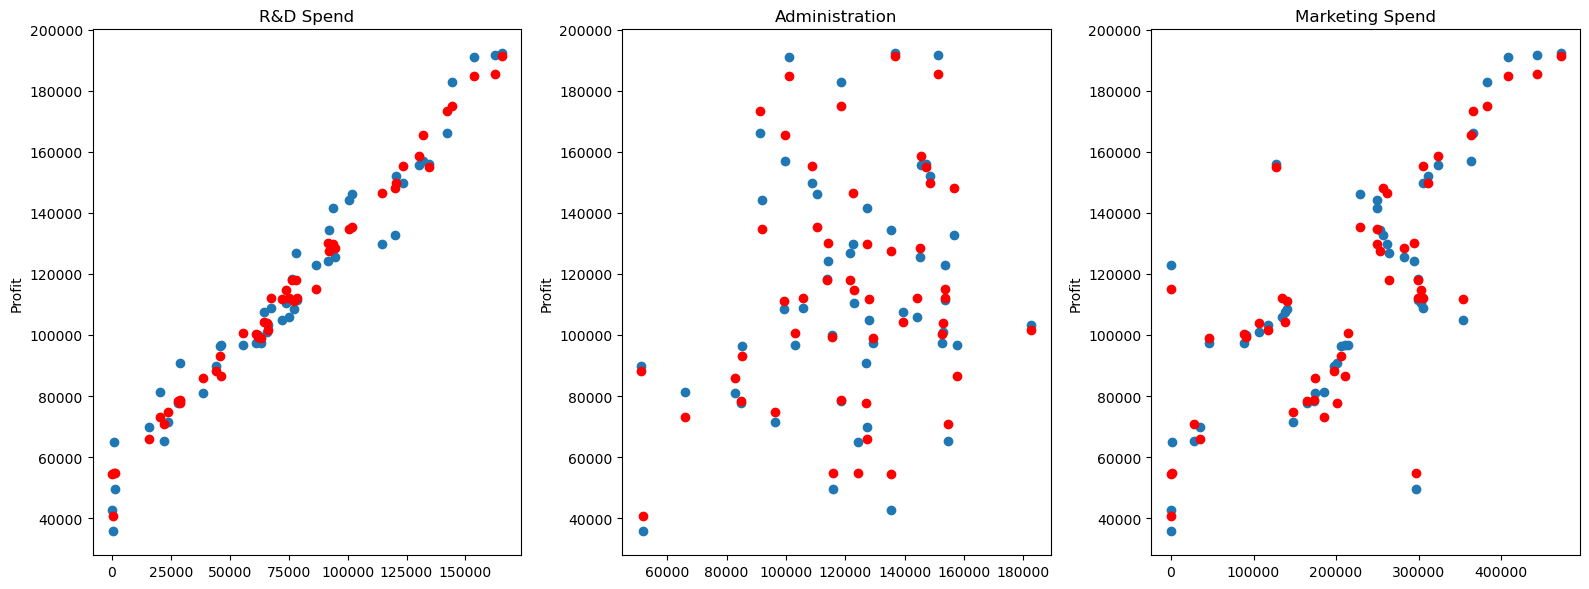

In [96]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['R&D Spend'],df['Profit'],'o')
axes[0].plot(df['R&D Spend'],y_hat,'o',color='red')
axes[0].set_ylabel("Profit")
axes[0].set_title("R&D Spend")

axes[1].plot(df['Administration'],df['Profit'],'o')
axes[1].plot(df['Administration'],y_hat,'o',color='red')
axes[1].set_title("Administration")
axes[1].set_ylabel("Profit")

axes[2].plot(df['Marketing Spend'],df['Profit'],'o')
axes[2].plot(df['Marketing Spend'],y_hat,'o',color='red')
axes[2].set_title("Marketing Spend");
axes[2].set_ylabel("Profit")
plt.tight_layout()
plt.savefig('figure.png')
plt.show();
